# DATASETS & DATALOADERS

- When processing data for machine learning, the code can become messy and hard to manage.
- To improve readability and modularity, PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset`.
- The `Dataset` class is used to store data samples along with their corresponding labels.
- `DataLoader` wraps around the `Dataset` and creates an iterable, making it easy to access the data samples during model training.
- This separation allows us to keep the dataset handling code separate from the model training code, leading to cleaner and more maintainable code.

## Loading a Dataset

 Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
training_data = datasets.FashionMNIST(
    root="data",          #root is the path where the train/test data is stored,
    train=True,           #train specifies training or test dataset
    download=True,        #download=True downloads the data from the internet if it’s not available at root
    transform=ToTensor()  #transform specifies the feature and label transformations
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## Iterating and Visualizing the Dataset

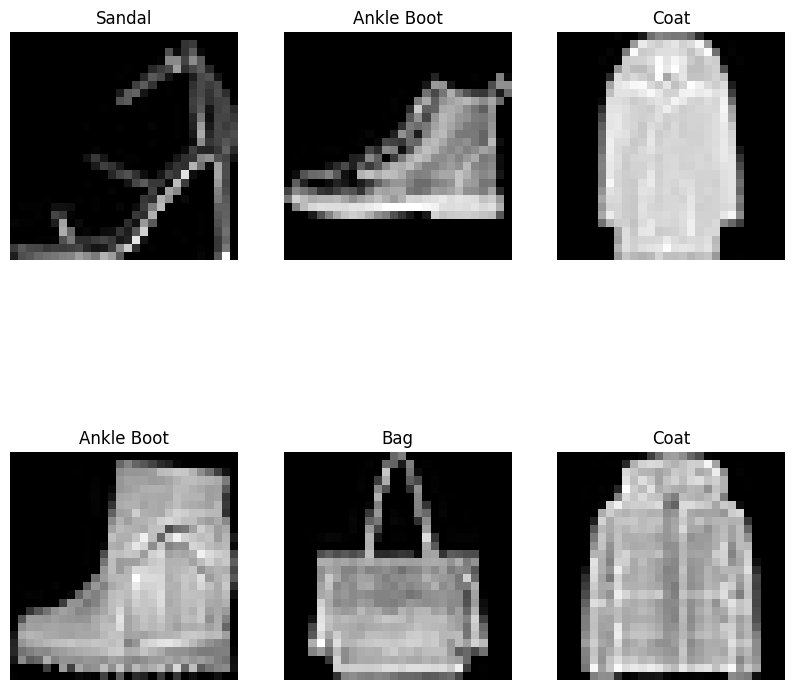

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(10, 10))
cols, rows = 3, 2
for i in range(1, cols * rows + 1):
    #selecting an index at random from the training dataset
    sample_idx = torch.randint(len(training_data), size=(1,)).item()  
    img, label = training_data[sample_idx]   #getting the image and the label from the training data
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])   #setting the title to particular image 
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")  # Showing the image in grayscale
plt.show()

## Preparing the data for training with DataLoaders

In [4]:
from torch.utils.data import DataLoader

# Create a DataLoader for the training dataset
# training_data: The dataset that contains the training samples and their corresponding labels
# batch_size=64: Each batch will contain 64 data samples
# shuffle=True: The data will be randomly shuffled during each epoch for better training performance
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)

# Create a DataLoader for the test dataset
# test_data: The dataset that contains the test samples and their corresponding labels
# batch_size=64: Each batch will contain 64 data samples
# shuffle=True: The data will be randomly shuffled during each epoch for better evaluation
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


## Iterating through the DataLoader

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


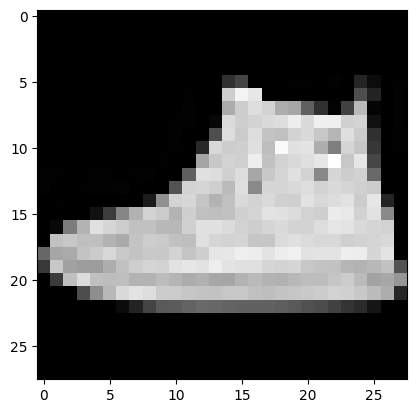

Label: 9


In [5]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")